<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/NLP/Kaggle_news_summary/Kaggle_new_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/sunnysai12345/news-summary/notebooks

In [17]:
import pandas as pd
import numpy as np

In [19]:
data = pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_new_summary/news_summary.csv', encoding='iso-8859-1')
print(data.shape)
data.head()

(4514, 6)


,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


# Summary with gensim.summarization

In [20]:
data.headlines[0] # summary

'Daman & Diu revokes mandatory Rakshabandhan in offices order'

In [29]:
DOCUMENT=data.ctext[0]
print(len(DOCUMENT))
DOCUMENT

2313


'The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,? the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ? one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ? were issued by the Dama

In [33]:
from gensim.summarization import summarize
Document_summary=summarize(DOCUMENT, ratio=0.1, split=False)
print(len(Document_summary))
Document_summary

464


'The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7.'

In [34]:
Document_summary=summarize(DOCUMENT, word_count=75, split=False)
print(len(Document_summary))
Document_summary

464


'The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7.'

# Summary by Latent Semantic Analysis

## Prepare Data

In [35]:
DOCUMENT_summary_ref=data.headlines[0] # summary
DOCUMENT_summary_ref

'Daman & Diu revokes mandatory Rakshabandhan in offices order'

In [36]:
DOCUMENT=data.ctext[0]
print(len(DOCUMENT))
DOCUMENT

2313


'The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,? the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ? one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ? were issued by the Dama

In [37]:
import nltk
nltk.download('punkt')

sentences = nltk.sent_tokenize(DOCUMENT)
print(len(sentences))
sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
16


['The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.',
 '?It has been decided to celebrate the festival of Rakshabandhan on August 7.',
 'In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,?',
 'the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ?',
 'one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ?',
 'w

In [38]:
import numpy as np
import re
nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['daman diu administration wednesday withdrew circular asked women staff tie rakhis male colleagues order triggered backlash employees ripped apart social mediathe union territorys administration forced retreat within hours issuing circular made compulsory staff celebrate rakshabandhan workplace',
       'decided celebrate festival rakshabandhan august',
       'connection offices departments shall remain open celebrate festival collectively suitable time wherein lady staff shall tie rakhis colleagues'],
      dtype='<U418')

## Text Representation with Feature Engineering

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(10)
# 160 word for 16 sentences

(160, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
administration,0.30,0.00,0.0,0.00,0.0,0.44,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
administrative,0.00,0.00,0.0,0.00,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
administrator,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.14,0.0,0.00,0.00
affairs,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.14,0.0,0.00,0.00
al,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.14,0.0,0.00,0.00
apart,0.15,0.00,0.0,0.00,0.0,0.44,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
areas,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.27,0.00
asked,0.15,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.37
attendance,0.00,0.00,0.0,0.23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
august,0.00,0.48,0.0,0.20,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00


## Latent Semantic Analysis

In [41]:
from scipy.sparse.linalg import svds
    
def low_rank_svd(matrix, singular_count=2):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

In [42]:
td_matrix.shape

(160, 16)

In [43]:
num_sentences = 8
num_topics = 3

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(160, 3) (3,) (3, 16)


In [44]:
# remove singular values below threshold                                         
sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

In [45]:
salience_scores = np.sqrt(np.dot(np.square(singular_values), 
                                 np.square(topic_document_mat)))
salience_scores

array([7.10884897e-01, 5.86168156e-01, 4.14717956e-01, 3.99243262e-01,
       2.32314401e-01, 8.14953625e-01, 6.48544426e-01, 6.22652813e-01,
       1.33316912e-15, 3.04997930e-01, 1.10397456e-01, 5.77438268e-01,
       4.33658703e-01, 8.88920914e-02, 6.38422065e-01, 5.59966282e-01])

In [46]:
top_sentence_indices = (-salience_scores).argsort()[:num_sentences]
top_sentence_indices.sort()
top_sentence_indices

array([ 0,  1,  5,  6,  7, 11, 14, 15])

In [51]:
# Summary:
a='\n'.join(np.array(sentences)[top_sentence_indices])
print(len(a))
print(a)

1015
The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.
?It has been decided to celebrate the festival of Rakshabandhan on August 7.
were issued by the Daman and Diu administration a day apart.
The circular was withdrawn through a one-line order issued late in the evening by the UT?s department of personnel and administrative reforms.
?The circular is ridiculous.
an official told Hindustan Times earlier in the day.
The RSS is the ideological parent of the ruling BJP.Last year, women ministers in the Modi government went to the border areas to celebrate the festival with soldiers.
A year before, all cabinet ministers were asked to go to their constituenci

In [52]:
print(len(DOCUMENT))

2313


# Summary by Text Rank

In [55]:
print(dt_matrix.shape) # TF IDF
dt_matrix
# 16 sentences, 160 words

(16, 160)


array([[0.29617183, 0.        , 0.        , ..., 0.14808591, 0.14808591,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.23778078, 0.        ,
        0.21276607],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.33087301]])

In [56]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)
# Tim su tuong quan 16 cau nay

(16, 16)


array([[1.   , 0.104, 0.167, 0.024, 0.039, 0.297, 0.096, 0.163, 0.   ,
        0.058, 0.078, 0.   , 0.029, 0.   , 0.058, 0.055],
       [0.104, 1.   , 0.121, 0.096, 0.127, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.033, 0.   , 0.139, 0.099],
       [0.167, 0.121, 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.08 , 0.   , 0.   , 0.014, 0.   , 0.06 , 0.043],
       [0.024, 0.096, 0.   , 1.   , 0.053, 0.058, 0.133, 0.   , 0.   ,
        0.078, 0.   , 0.   , 0.036, 0.   , 0.038, 0.   ],
       [0.039, 0.127, 0.   , 0.053, 1.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.073, 0.   , 0.   , 0.   ],
       [0.297, 0.   , 0.   , 0.058, 0.   , 1.   , 0.078, 0.   , 0.   ,
        0.   , 0.   , 0.158, 0.122, 0.   , 0.   , 0.   ],
       [0.096, 0.   , 0.   , 0.133, 0.   , 0.078, 1.   , 0.148, 0.   ,
        0.   , 0.   , 0.   , 0.022, 0.   , 0.   , 0.   ],
       [0.163, 0.   , 0.   , 0.   , 0.   , 0.   , 0.148, 1.   , 0.   ,
        0.   , 0.   , 0.  

In [57]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)

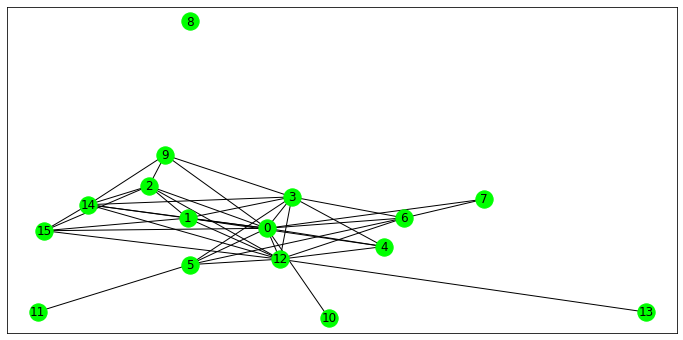

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [59]:
scores = networkx.pagerank(similarity_graph)
scores

{0: 0.08402715574631894,
 1: 0.06817553615141268,
 2: 0.0606769103760126,
 3: 0.06269033329887282,
 4: 0.05674163840460933,
 5: 0.06899558682434141,
 6: 0.061519726964287584,
 7: 0.05684394169335768,
 8: 0.0625,
 9: 0.05692218966211677,
 10: 0.0565037704645361,
 11: 0.05559125914957253,
 12: 0.06300623547721208,
 13: 0.05923237560535922,
 14: 0.06647327822120137,
 15: 0.060100061960788646}

In [60]:
ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
ranked_sentences[:10]
# 10 cau co diem so cao nhat

[(0.08402715574631894, 0),
 (0.06899558682434141, 5),
 (0.06817553615141268, 1),
 (0.06647327822120137, 14),
 (0.06300623547721208, 12),
 (0.06269033329887282, 3),
 (0.0625, 8),
 (0.061519726964287584, 6),
 (0.0606769103760126, 2),
 (0.060100061960788646, 15)]

In [62]:
top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
top_sentence_indices.sort()
summary_text_rank='\n'.join(np.array(sentences)[top_sentence_indices])
print(len(summary_text_rank))
summary_text_rank

1635


'The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.\n?It has been decided to celebrate the festival of Rakshabandhan on August 7.\nthe order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ?\nwere issued by the Daman and Diu administration a day apart.\nThe circular was withdrawn through a one-line order issued late in the evening by the UT?s department of personnel and administrative reforms.\nThere are sensitivities involved.\nShe refused to be identified.The notice was issued on Daman and Diu 

# From Kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
summary = pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_new_summary/news_summary.csv', encoding='iso-8859-1')
raw = pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_new_summary/news_summary_more.csv', encoding='iso-8859-1')

In [4]:
print(summary.shape)
print(raw.shape)

(4514, 6)
(98401, 2)


In [5]:
summary.head(2)

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."


In [6]:
raw.head(2)

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...


In [7]:
pre1 =  raw.iloc[:,0:2].copy()
# pre1['head + text'] = pre1['headlines'].str.cat(pre1['text'], sep =" ") 

pre2 = summary.iloc[:,0:6].copy()
pre2['text'] = pre2['author'].str.cat(pre2['date'].str.cat(pre2['read_more'].str.cat(pre2['text'].str.cat(pre2['ctext'], sep = " "), sep =" "),sep= " "), sep = " ")

In [9]:
pre = pd.DataFrame()
pre['text'] = pd.concat([pre1['text'], pre2['text']], ignore_index=True)
pre['summary'] = pd.concat([pre1['headlines'],pre2['headlines']],ignore_index = True)

In [10]:
pre.head()

,text,summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...
2,New Zealand defeated India by 8 wickets in the...,New Zealand end Rohit Sharma-led India's 12-ma...
3,"With Aegon Life iTerm Insurance plan, customer...",Aegon life iTerm insurance plan helps customer...
4,Speaking about the sexual harassment allegatio...,"Have known Hirani for yrs, what if MeToo claim..."


## Perform Data Cleansing

In [11]:
import re

#Removes non-alphabetic characters:
def text_strip(column):
    for row in column:
        
        #ORDER OF REGEX IS VERY VERY IMPORTANT!!!!!!
        
        row=re.sub("(\\t)", ' ', str(row)).lower() #remove escape charecters
        row=re.sub("(\\r)", ' ', str(row)).lower() 
        row=re.sub("(\\n)", ' ', str(row)).lower()
        
        row=re.sub("(__+)", ' ', str(row)).lower()   #remove _ if it occors more than one time consecutively
        row=re.sub("(--+)", ' ', str(row)).lower()   #remove - if it occors more than one time consecutively
        row=re.sub("(~~+)", ' ', str(row)).lower()   #remove ~ if it occors more than one time consecutively
        row=re.sub("(\+\++)", ' ', str(row)).lower()   #remove + if it occors more than one time consecutively
        row=re.sub("(\.\.+)", ' ', str(row)).lower()   #remove . if it occors more than one time consecutively
        
        row=re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower() #remove <>()|&©ø"',;?~*!
        
        row=re.sub("(mailto:)", ' ', str(row)).lower() #remove mailto:
        row=re.sub(r"(\\x9\d)", ' ', str(row)).lower() #remove \x9* in text
        row=re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower() #replace INC nums to INC_NUM
        row=re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower() #replace CM# and CHG# to CM_NUM
        
        
        row=re.sub("(\.\s+)", ' ', str(row)).lower() #remove full stop at end of words(not between)
        row=re.sub("(\-\s+)", ' ', str(row)).lower() #remove - at end of words(not between)
        row=re.sub("(\:\s+)", ' ', str(row)).lower() #remove : at end of words(not between)
        
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        
        #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass #there might be emails with no url in them
        

        
        row = re.sub("(\s+)",' ',str(row)).lower() #remove multiple spaces
        
        #Should always be last
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        yield row

In [12]:
brief_cleaning1 = text_strip(pre['text'])
brief_cleaning2 = text_strip(pre['summary'])

In [13]:
from time import time
import spacy
nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:
#If data loss seems to be happening(i.e len(text) = 50 instead of 75 etc etc) in this cell , decrease the batch_size parametre 

t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
text = [str(doc) for doc in nlp.pipe(brief_cleaning1, batch_size=5000, n_threads=-1)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 4.95 mins


In [14]:
#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:


t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(brief_cleaning2, batch_size=5000, n_threads=-1)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.93 mins


In [15]:
text[0]

'saurav kant an alumnus of upgrad and iiit-b pg program in machine learning and artificial intelligence was sr systems engineer at infosys with almost years of work experience the program and upgrad 360-degree career support helped him transition to data scientist at tech mahindra with 90% salary hike upgrad online power learning has powered lakh+ careers.'

In [16]:
summary[0]

'_START_ upgrad learner switches to career in ml al with 90% salary hike _END_'

In [17]:
pre['cleaned_text'] = pd.Series(text)
pre['cleaned_summary'] = pd.Series(summary)
pre

,text,summary,cleaned_text,cleaned_summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...,saurav kant an alumnus of upgrad and iiit-b pg...,_START_ upgrad learner switches to career in m...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...,kunal shah credit card bill payment platform c...,_START_ delhi techie wins free food from swigg...
2,New Zealand defeated India by 8 wickets in the...,New Zealand end Rohit Sharma-led India's 12-ma...,new zealand defeated india by wickets in the f...,_START_ new zealand end rohit sharma-led india...
3,"With Aegon Life iTerm Insurance plan, customer...",Aegon life iTerm insurance plan helps customer...,with aegon life iterm insurance plan customers...,_START_ aegon life iterm insurance plan helps ...
4,Speaking about the sexual harassment allegatio...,"Have known Hirani for yrs, what if MeToo claim...",speaking about the sexual harassment allegatio...,_START_ have known hirani for yrs what if meto...
...,...,...,...,...
102910,"Mansha Mahajan 24 Feb 2017,Friday http://india...",Rasna seeking ?250 cr revenue from snack categ...,mansha mahajan 24 feb 2017 friday indiatoday.i...,_START_ rasna seeking 250 cr revenue from snac...
102911,"Dishant Sharma 03 Aug 2017,Thursday http://ind...",Sachin attends Rajya Sabha after questions on ...,dishant sharma 03 aug 2017 thursday indiatoday...,_START_ sachin attends rajya sabha after quest...
102912,"Tanya Dhingra 03 Aug 2017,Thursday http://www....",Shouldn't rob their childhood: Aamir on kids r...,tanya dhingra 03 aug 2017 thursday www.hindust...,_START_ shouldn rob their childhood aamir on k...
102913,"Pragya Swastik 07 Dec 2016,Wednesday http://in...","Asha Bhosle gets ?53,000 power bill for unused...",pragya swastik 07 dec 2016 wednesday indiatoda...,_START_ asha bhosle gets 53 000 power bill for...


In [18]:
text_count = []
summary_count = []

In [19]:
for sent in pre['cleaned_text']:
    text_count.append(len(sent.split()))
for sent in pre['cleaned_summary']:
    summary_count.append(len(sent.split()))

In [20]:
graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count

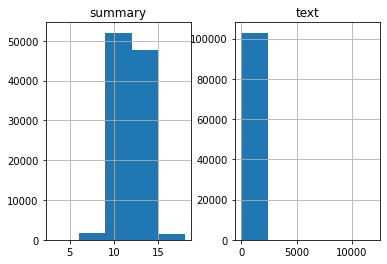

In [21]:
import matplotlib.pyplot as plt

graph_df.hist(bins = 5)
plt.show()

In [22]:
#Check how much % of summary have 0-15 words
cnt=0
for i in pre['cleaned_summary']:
    if(len(i.split())<=15):
        cnt=cnt+1
print(cnt/len(pre['cleaned_summary']))

0.9978234465335472


In [23]:
#Check how much % of text have 0-70 words
cnt=0
for i in pre['cleaned_text']:
    if(len(i.split())<=100):
        cnt=cnt+1
print(cnt/len(pre['cleaned_text']))

0.9578389933440218


In [24]:
#Model to summarize the text between 0-15 words for Summary and 0-100 words for Text
max_text_len=100
max_summary_len=15

In [25]:
#Select the Summaries and Text between max len defined above

cleaned_text =np.array(pre['cleaned_text'])
cleaned_summary=np.array(pre['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre=pd.DataFrame({'text':short_text,'summary':short_summary})

In [26]:
print(cleaned_summary.shape)
print(post_pre.shape)
post_pre.head(2)
# Loai bo nhung doan van co do dai text > 100 va summary > 15

(102915,)
(98353, 2)


,text,summary
0,saurav kant an alumnus of upgrad and iiit-b pg...,_START_ upgrad learner switches to career in m...
1,kunal shah credit card bill payment platform c...,_START_ delhi techie wins free food from swigg...


## SEQ2SEQ MODEL BUILDING

In [35]:
post_pre.to_csv('/content/drive/My Drive/Data/NLP/Kaggle_new_summary/text_train_split.csv')

In [27]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(post_pre['text']),np.array(post_pre['summary']),test_size=0.2,random_state=0,shuffle=True)

In [28]:
print(x_tr.shape)
print(y_tr.shape)
print(x_val.shape)
print(y_val.shape)

(78682,)
(78682,)
(19671,)
(19671,)


In [29]:
x_tr[:3]

array(['a 15-year-old haryana girl has been found to be seven-months pregnant after two of her cousins allegedly raped her several times the incident came to light after she complained of stomach ache and was taken to the hospital on july 29 the police have arrested one of the accused who is juvenile while the other is on the run.',
       'hillary clinton has called us president donald trump creep in her new book titled what happened saying he made her skin crawl at debate during the presidential race clinton revealed in the book that trump made her feel incredibly uncomfortable and was breathing down her neck by stalking her around the stage.',
       'it giant cognizant has deferred salary hikes and promotions for its employees for three months according to reports for employees up to the level of vice president the new salaries would be effective from october the decision comes amid the ongoing stress in the it industry and visa limitations by donald trump-led government in the us.

In [30]:
#Lets tokenize the text to get the vocab count , you can use Spacy here also

from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

RARE WORD ANALYSIS FOR X i.e 'text'

tot_cnt gives the size of vocabulary (which means every unique words in the text)

cnt gives me the no. of rare words whose count falls below threshold

tot_cnt - cnt gives me the top most common words

In [31]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 58.01403415861247
Total Coverage of rare words: 1.4393667575801972


In [32]:
tot_cnt #gives the size of vocabulary (which means every unique words in the text)

75530

In [33]:
cnt #gives me the no. of rare words whose count falls below threshold

43818

In [36]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 31713


In [37]:
print(x_tr_seq[0])

[50, 233, 29, 55, 735, 249, 7, 31, 151, 2, 24, 416, 304, 2131, 18, 54, 4, 33, 11939, 115, 1203, 33, 250, 315, 1, 238, 331, 2, 767, 18, 41, 1558, 4, 4093, 11637, 5, 11, 296, 2, 1, 287, 6, 613, 965, 1, 47, 25, 158, 61, 4, 1, 107, 27, 12, 5266, 44, 1, 111, 12, 6, 1, 308]


In [38]:
print(x_tr[0])

[   50   233    29    55   735   249     7    31   151     2    24   416
   304  2131    18    54     4    33 11939   115  1203    33   250   315
     1   238   331     2   767    18    41  1558     4  4093 11637     5
    11   296     2     1   287     6   613   965     1    47    25   158
    61     4     1   107    27    12  5266    44     1   111    12     6
     1   308     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


In [39]:
print(x_tr.shape,x_val.shape)

(78682, 100) (19671, 100)


RARE WORD ANALYSIS FOR Y i.e 'summary'

tot_cnt gives the size of vocabulary (which means every unique words in the text)

cnt gives me the no. of rare words whose count falls below threshold

tot_cnt - cnt gives me the top most common words

In [40]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [41]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 66.95921528136293
Total Coverage of rare words: 4.530993621940351


In [42]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 10881


In [43]:
print(y_tr.shape,y_val.shape)

(78682, 15) (19671, 15)


We will now remove "Summary" i.e Y (both train and val) which has only START and END

In [44]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [45]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [46]:
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary from the w2v model = {}".format(x_voc))

Size of vocabulary from the w2v model = 31713


In [47]:
K.clear_session()

latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 200)     6342600     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 100, 300), ( 601200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [48]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [49]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,
                  epochs=25,callbacks=[es],batch_size=128,
                  validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/25
 28/615 [>.............................] - ETA: 16:58 - loss: 6.2641

KeyboardInterrupt: ignored

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Next, let’s build the dictionary to convert the index to word for target and source vocabulary:

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

We are defining a function below which is the implementation of the inference process

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

Let us define the functions to convert an integer sequence to a word sequence for summary as well as the reviews:

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

Run the model over the data to see the results

In [ ]:
for i in range(0,100):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")